In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [15]:
X = X[y != 2]
y = y[y != 2]
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
def train_svm(X, y, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            condition = y[idx] * (np.dot(x_i, w) - b) >= 1
            if condition:
                w -= learning_rate * (2 * lambda_param * w)
            else:
                w -= learning_rate * (2 * lambda_param * w - np.dot(x_i, y[idx]))
                b -= learning_rate * y[idx]
    return w, b

In [17]:
w, b = train_svm(X_train, y_train)

def predict_svm(X, w, b):
    approx = np.dot(X, w) - b
    return np.sign(approx)

y_pred = predict_svm(X_test, w, b)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


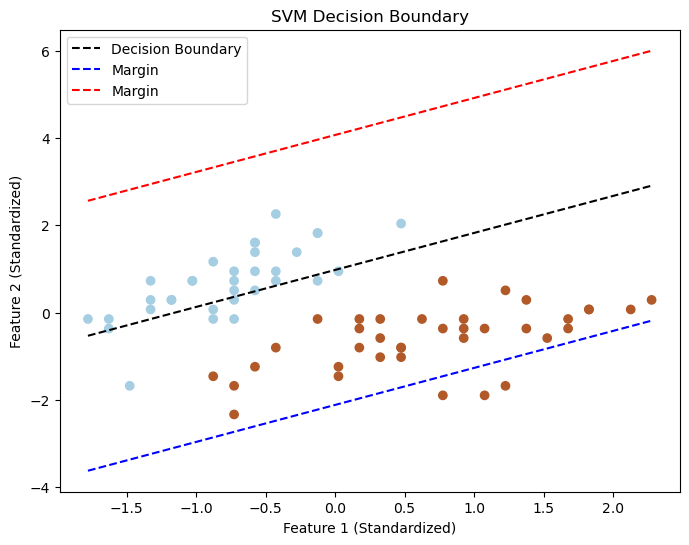

In [18]:
def plot_decision_boundary(X, y, w, b):
    def hyperplane(x, offset):
        return (-w[0] * x + b + offset) / w[1]

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    x_vals = np.linspace(x_min, x_max, 100)

    plt.plot(x_vals, hyperplane(x_vals, 0), "k--", label="Decision Boundary")
    plt.plot(x_vals, hyperplane(x_vals, 1), "b--", label="Margin")
    plt.plot(x_vals, hyperplane(x_vals, -1), "r--", label="Margin")

    plt.xlabel("Feature 1 (Standardized)")
    plt.ylabel("Feature 2 (Standardized)")
    plt.title("SVM Decision Boundary")
    plt.legend()
    plt.show()

plot_decision_boundary(X_train, y_train, w, b)